### Author: Greema Regmi
### Last Modified: Oct 5. 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy import stats
import os

import fortranformat as ff


#Tamu database for size parameter is neither linear nor exponential.For GRASP it is required for the size parameter to belognormally spaced. Hence we do the exponial fit of the data andlater extend the data to required range


0.16279100867003773 390.2269304989932 0.0295262467116117 11810.4990234375


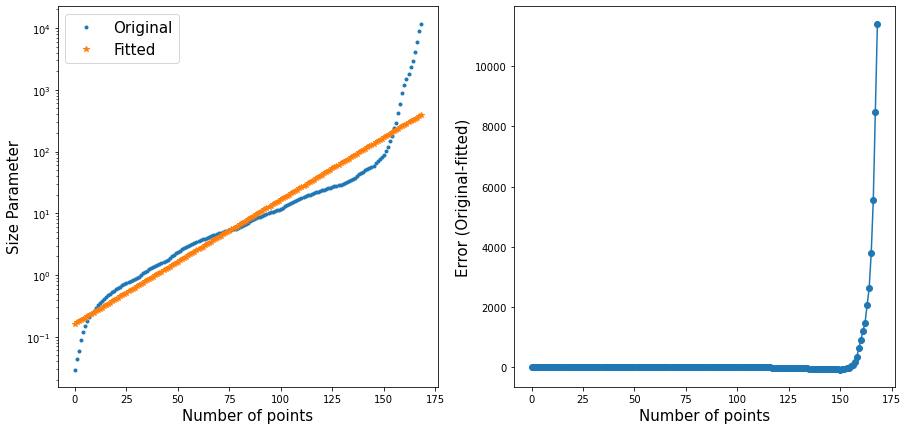

In [2]:
df= pd.read_csv("/home/gregmi/TAMU_project/DATABASE.csv") # Reading the Database file from TAMU 
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ys = df['Size Parameter:']
xs = np.arange(0,169,1)[:len(ys) ]
ax[0].plot(xs, ys, '.', label='Original')

#Lognormal fitting of the original data
Pp = np.polyfit(xs, np.log(ys), 1)
fit = np.exp(Pp[1]) * np.exp(Pp[0] * xs)


#Plotting
ax[0].plot(xs, fit, '*', label = "Fitted")
ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
ax[0].set_ylabel("Size Parameter", fontsize=15 )
ax[0].set_xlabel("Number of points",fontsize=15 )

diff = (ys-fit) #Difference between the fit and the original 

ax[1].plot(diff, marker ='o')
ax[1].set_ylabel("Error (Original-fitted)",fontsize=15 )
ax[1].set_xlabel("Number of points",fontsize=15 )

print(np.min(fit),np.max(fit), np.min(ys),np.max(ys) )

273
0.03872556175778054 11478.143008998231


Text(0.5, 1.0, 'Number of points: 273, Min:0.0387256 , Max:11478.143009 ')

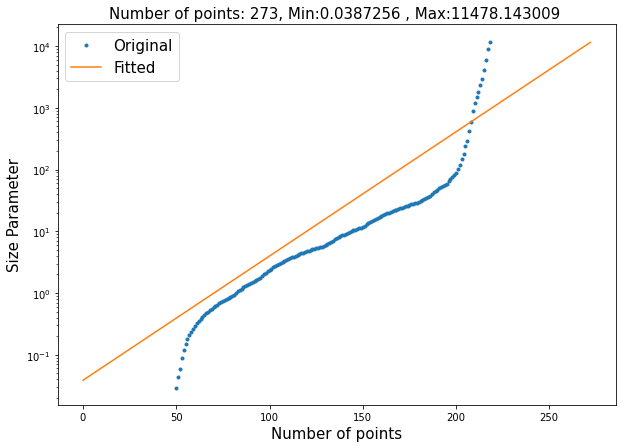

In [3]:
#Calculating the ratio of normal distribution 
for i in range(len(fit)-1):
    ratio = fit[i]/fit[i+1]
#     print(ratio)

#Adding more values in the fit to cover the both limits of the data
a = fit[0]
add_value=[]
for i in range(31):
    new = a *ratio
    add_value.append(new)
    a = new

b = fit[-1]
back_value=[]
for i in range(73):
    new = b /ratio
    back_value.append(new)
    b = new

data1 = np.concatenate((np.array(add_value[::-1]), np.array(fit)), axis=0)
data2 = np.concatenate((data1, np.array(back_value)), axis=0)


ys = df['Size Parameter:']
xs = np.arange(0,169,1)[:len(ys)]+50

fig =plt.figure(figsize=(10, 7))
plt.plot(xs, ys, '.', label='Original')
plt.plot(data2, label = "Fitted")
plt.yscale('log')
print(len(data2))
print(np.min(data2),np.max(data2)), np.min(df['Size Parameter:'])
plt.legend(fontsize=15)
plt.ylabel("Size Parameter",fontsize=15 )
plt.xlabel("Number of points",fontsize=15 )

plt.title(f"Number of points: {len(data2)}, Min:{round(np.min(data2),7)} , Max:{round(np.max(data2),7)} ",fontsize=15)

### Real refractive Index 

[1.3701     1.41343334 1.45676667 1.50010001 1.54343334 1.58676668
 1.63010001 1.67343335]


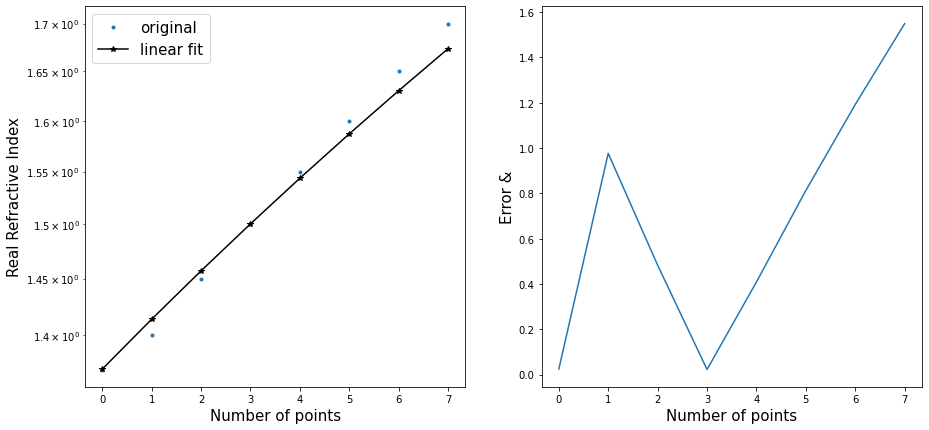

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ys = df['Real Refractive Index:'][:8]
xs=np.arange(0,len(ys),1)[:8]
ax[0].plot(xs, ys, '.', label='original')

ax[0].set_yscale('log')
ax[0].set_ylabel("Real Refractive Index",fontsize=15)
ax[0].set_xlabel("Number of points",fontsize=15)
#linear fit
linear = stats.linregress((xs,ys))
RI_fit = linear.intercept+0.012+(linear.slope-0.005)*xs  #values are adjusted  to get the closer fit
ax[0].plot(xs,RI_fit, 'k',marker = "*", label='linear fit')

ax[0].set_yscale('log')
ax[0].legend(fontsize=15)
 

diff= abs(ys-RI_fit)
ax[1].plot(100*diff/ys)
ax[1].set_ylabel("Error &",fontsize=15)
ax[1].set_xlabel("Number of points",fontsize=15)
#fixing the bounds
RI= RI_fit
TAMU_min=1.3701
constant= TAMU_min - RI[0]
new_RI=RI+constant
print(new_RI)
ri=pd.DataFrame()
ri['RI']= new_RI

### Imaginary refractive index 

Text(0.5, 1.0, 'TAMUDUST2020 Database Imaginary Refractive Index')

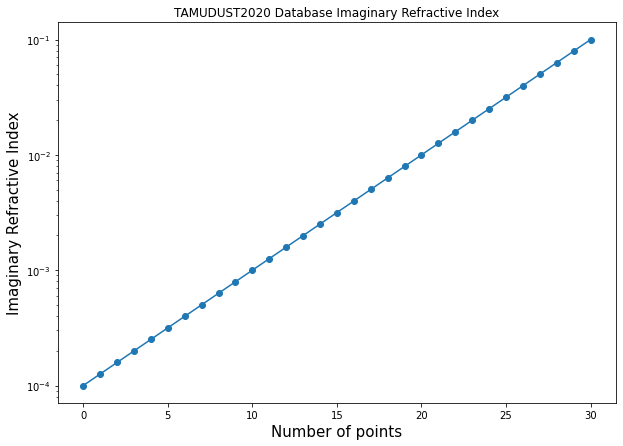

In [5]:
fig =plt.figure(figsize=(10, 7))
plt.plot(df['Imaginary Refractive Index:'],marker="o")
plt.yscale('log')
plt.ylabel("Imaginary Refractive Index",fontsize=15 )
plt.xlabel("Number of points",fontsize=15 )
plt.title("TAMUDUST2020 Database Imaginary Refractive Index")

In [6]:
wl=0.34 # in um
Diameter =(data2*wl)/(2*np.pi)    #from the definition of the size parameter in the TAMU DATA base which is 2*pi*D/wl
Radius =Diameter/2
len(Diameter)

#Diameter parameter file for TAMU

# params_path = '/home/gregmi/TAMU_project/TAMUdust2020-v1.0/examples/params/TAMUdust2020_Size'
params_path = '/home/gregmi/TAMU_project/TAMUdust2020-master/examples/params/TAMUdust2020_Size'
with open(params_path, "w") as file_object:
    for i in range(len(Diameter) ):
        file_object.write(f'{"{:.7e}".format(Diameter[i])}')

        file_object.write("\n")

#Wavelength parameter file for TAMU
Imag1 = df['Imaginary Refractive Index:'][:31].values

params_path_wl = "/home/gregmi/TAMU_project/TAMUdust2020-master/examples/params/TAMUdust2020_Wavelength_exp1"
with open(params_path_wl, "w") as file_object:
    for i in range(len(Imag1)):

        file_object.write(f'{"{:.7e}".format(wl)}')
        file_object.write("\n")

In [7]:
#Storing the TAMU results for all the optical properites in the following lists #Scattering properties
Qext_max=[]
Qsca_max=[]
Area_max=[]
Volume_max=[]
Dimension_max=[]
SSA_max=[]

#Phase function: the following list stores all the output values from the TAMU run
P11=[]
P12=[]
P22=[]
P33=[]
P43=[]
P44=[]

#We cannot change the TAMUdust angle range : (0,180,0.1). Extrating the values  Tamu has more finer angular resolution 
Angles =np.linspace(0,180,181)
Ang_format=[]
for i in range(181):
    Ang_format.append("{:.7E}".format(Angles[i]))
    
#Path to parameter files for refractive index
params_path="/home/gregmi/TAMU_project/TAMUdust2020-master/examples/params/TAMUdust2020_RefractiveIndex_exp1"
output_path="/home/gregmi/TAMU_project/TAMUdust2020-master/examples/output/TAMUdust2020create_exp1"


#TAMUdust2020create calculates optical properties at each wavelength.
#reapeating the values of wavelength and real refractive indices for different v
#updating the RI paramter files for each values of real imaginary refractive ind Imag1 - dfl'Imaginary Refractive Index:'][:31].values
for j in range (len(new_RI)):
        with open(params_path, "w") as file_object:
            for i in range(len(Imag1)):
                file_object.write("{:.5E}".format(new_RI[j])+' '+"\t"+"{: .5E}".format(Imag1[i]))
                file_object.write("\n")
#Running the TAMU2020 ( ../bin/tamudust2020create {NAMELIST})
        os.system('/home/gregmi/TAMU_project/TAMUdust2020-master/bin/tamudust2020create /home/gregmi/TAMU_project/TAMUdust2020-master/examples/TAMUdust2020create_exp1.nml')
    
        
        #Reading the output files
                                  
        fn_Scattering = output_path+'/isca.dat'
        df1 = pd.read_csv(fn_Scattering, delim_whitespace=True, usecols=[0, 1, 2, 3,4,5,6], names =["Wl","Dimension","Volume","Projected_area","Qe", "SSA","g"])
                                                                         
        Qext_max.append(df1["Qe"])
        Qsca_max.append(df1["Qe"]*df1["SSA"])#scattering efficiency
        Area_max.append(df1[ 'Projected_area'])
        Volume_max.append(df1['Volume'])
        Dimension_max.append(df1['Dimension'])
        SSA_max.append(df1["SSA"])
                                                                         
        fn_Scattering = output_path+'/P11.dat'
        df1 = pd.read_csv(fn_Scattering,delim_whitespace=True)
        P11.append(df1[Ang_format])
                                                                         
        fn_Scattering = output_path+'/P12.dat'
        dfl = pd.read_csv(fn_Scattering,delim_whitespace=True)
        P12.append(dfl[Ang_format])
                                                                         
        fn_Scattering = output_path+'/P22.dat'
        dfl = pd.read_csv(fn_Scattering, delim_whitespace=True)
        P22.append(dfl[Ang_format])
                                                                         
        fn_Scattering = output_path+'/P33.dat'
        dfl = pd.read_csv(fn_Scattering, delim_whitespace=True)
        P33.append(dfl[Ang_format])
                                                                         
        fn_Scattering = output_path+'/P44.dat'
        df1 = pd.read_csv(fn_Scattering, delim_whitespace=True) 
        P44.append(df1[Ang_format])
                                                                         
        fn_Scattering = output_path+'/P43.dat'
        df1 = pd.read_csv(fn_Scattering, delim_whitespace=True) 
        P43.append(df1[Ang_format])
        print("Done")

Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


Done


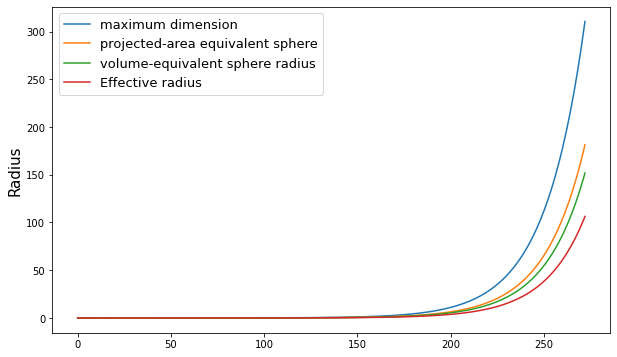

In [32]:
#reshaping all the TAMU output as (n_real_RI, n_imag_RI, n_size)

Dimension1 = np.array(Dimension_max).reshape(8,31,273)
Area1 =  np.array(Area_max).reshape(8,31,273)
Volume1 = np.array(Volume_max).reshape(8,31,273)
Qext1 = np.array(Qext_max).reshape(8,31,273)
Qsca1= np.array(Qsca_max).reshape(8,31,273)
Qabs1=Qext1-Qsca1
wl = "0.34000"

#UNcomment the folder name that you want to create

# folder_name = "Ver_sph"  #Kernels with volume equivalent radius and using volume and area of the spheres
#calcuating radius from the volume
# Radius_v = np.cbrt(3*Volume1[1,1,:]/(np.pi*4))
# Radius = Radius_v
# #The GARSP Kernels inputs bext *lnr
# dlnr = np.log(Radius_v[1]/Radius_v[0])
# #Uncomment this if you want to use the volume and area of sphere
# b_ext = Qext1*3*dlnr/(4*Radius_v)
# b_abs = Qabs1*3*dlnr/(4*Radius_v)





# folder_name = "Ver_TAMU" #kernels with volume equivalent radius and using volume and area definition of TAMU
# Radius_v = np.cbrt(3*Volume1[1,1,:]/(np.pi*4))
# dlnr = np.log(Radius_v[1]/Radius_v[0])
# b_ext = (Qext1 *Area1 *dlnr)/Volume1
# b_abs = (Qabs1 *Area1 *dlnr)/Volume1


# folder_name = "Eff_sph"  #Kernels with effiective radius and using volume and area of the spheres
# Radius_v =3*Volume1[1,1,:]/(4*Area1[1,1,:])
# Radius = Radius_v
# dlnr = np.log(Radius_v[1]/Radius_v[0])
# b_ext = Qext1*3*dlnr/(4*Radius_v)
# b_abs = Qabs1*3*dlnr/(4*Radius_v)



folder_name = "Eff_TAMU" #kernels with effective radius and using volume and area definition of TAMU
Radius_v =3*Volume1[1,1,:]/(4*Area1[1,1,:])
Radius = Radius_v
dlnr = np.log(Radius_v[1]/Radius_v[0])
b_ext = (Qext1 *Area1 *dlnr)/(4*Volume1)
b_abs = (Qabs1 *Area1 *dlnr)/(4*Volume1)


#Calculating the b_scattering
b_sca = b_ext - b_abs


#Calculation of radius
plt.figure(figsize =(10,6))
plt.plot(Dimension1[0,24,:]/2, label ="maximum dimension")
plt.plot(np.sqrt(Area1[0,24,:]/np.pi),label ="projected-area equivalent sphere")
plt.plot(np.cbrt(3*Volume1[0,24,:]/(np.pi*4)),label ="volume-equivalent sphere radius")
plt.plot(3*Volume1[0,24,:]/(4*Area1[0,24,:]), label= "Effective radius")
plt.ylabel("Radius", fontsize=15)
plt.legend( fontsize =13)





In [ ]:
sc = N sc = N (pi*D2/4) Qsc

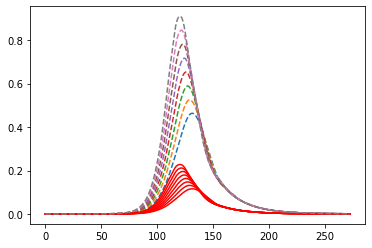

## Grid files

In [33]:
Angles =np.linspace(0,180,181)
         
with open(f'/home/shared/GRASP_GSFC/src/retrieval/internal_files/{folder_name}/grid1.dat', 'w') as f:
    f.write(f' {len(Radius_v)} 0.340\n')
    for i in range(len(Radius_v) ) :
        notation = str(0)+ff.FortranRecordWriter('(E12.7)').write([Radius_v[i]])
        f.write(f'{str(notation )}\n')
    f.write(f'\t{len(Angles)}\n')
    for i in range(len(Angles)):
        val ="{:.2f}".format(Angles[i])
        f.write(f'{str(val)}\n')

(0.48, 0.5)

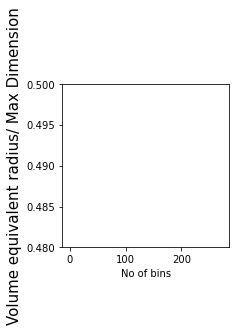

In [34]:
plt.figure(figsize = (3,3))
plt.plot(2*Radius_v/Dimension1[0,24,:])
plt.ylabel("Volume equivalent radius/ Max Dimension", fontsize = 15)
plt.xlabel("No of bins")
plt.ylim(0.48,0.5)

## 100 Kernels

In [35]:



with open(f'/home/shared/GRASP_GSFC/src/retrieval/internal_files/{folder_name}/kernels_100_00.txt','w')as f:
    
    f.write(f'{ "%s %s"%("{:.6E}".format(min(Radius_v)),"{:.6E}".format(max(Radius_v)))}  1.00000\n') 
    f.write(f'{-len(Radius_v)}   number of grid radii\n') 
    f.write(f'{"%s %s"%("{:.8}".format(min(new_RI)),"{:.8}".format(max(new_RI)))}  range of real refr. index\n')
    f.write(f'{"%s %s"%("{:.7E}".format(-min(Imag1)), "{:.7E}".format(-max(Imag1)))}  range of imag refr. index\n') #range of imaginary refractive index
    f.write(f'{"%s %s"%(len(new_RI),-len(Imag1))}   number of nodes for real and imag parts of refr. index')


    for i in range (len(new_RI)):           #loop over real RI
        for j in range(len(Imag1)):          #loop over imag RI
            f.write("\n")
            f.write(f' 0 1.00000 element, ratio \n')
            f.write(f'{"%s %s %s" %(wl,"{:.7}".format(new_RI[i]),"{:.7E}".format(-Imag1[j]))}   wavel, rreal, rimag\n')

            f.write("EXTINCTION (1/um):\n")
            for k in range (len(b_ext[0][1])): #loop over size parameters or dia 
                f.write("{:.7E}".format(float(b_ext[i][j][k]))+'\t') 
            f.write("\n")

            f.write("ABSORPTION (1/um):\n")
            for k in range (len(b_abs[0][0])): #loop over size parameters or di
                f.write("{:.7E}".format(float(b_abs[i][j][k]))+'\t')
        print(f"Done{i}")
    f.write('\n') 
    f.write('Shape distribution:\n')

    f.write("1 nr \n")
    f.write("#       r    rd \n")
    f.write("1      1.00000      0.100000E+01")

Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7


## 299_00 Kernels

In [36]:



with open(f'/home/shared/GRASP_GSFC/src/retrieval/internal_files/{folder_name}/kernels_299_00.txt','w')as f:
    
    f.write(f'{ "%s %s"%("{:.6E}".format(min(Radius_v)),"{:.6E}".format(max(Radius_v)))} 2.98600 \n') 
    f.write(f'{-len(Radius_v)}   number of grid radii\n') 
    f.write(f'{"%s %s"%("{:.8}".format(min(new_RI)),"{:.8}".format(max(new_RI)))}  range of real refr. index\n')
    f.write(f'{"%s %s"%("{:.7E}".format(-min(Imag1)), "{:.7E}".format(-max(Imag1)))}  range of imag refr. index\n') #range of imaginary refractive index
    f.write(f'{"%s %s"%(len(new_RI),-len(Imag1))}   number of nodes for real and imag parts of refr. index')


    for i in range (len(new_RI)):           #loop over real RI
        for j in range(len(Imag1)):          #loop over imag RI
            f.write("\n")
            f.write(f' 0 2.98600 element, ratio \n')
            f.write(f'{"%s %s %s" %(wl,"{:.7}".format(new_RI[i]),"{:.7E}".format(-Imag1[j]))}   wavel, rreal, rimag\n')

            f.write("EXTINCTION (1/um):\n")
            for k in range (len(b_ext[0][1])): #loop over size parameters or dia 
                f.write("{:.7E}".format(float(b_ext[i][j][k]))+'\t') 
            f.write("\n")

            f.write("ABSORPTION (1/um):\n")
            for k in range (len(b_abs[0][0])): #loop over size parameters or di
                f.write("{:.7E}".format(float(b_abs[i][j][k]))+'\t')
        print(f"Done{i}")
    f.write('\n') 
    f.write('Shape distribution:\n')

    f.write("1 nr \n")
    f.write("#       r    rd \n")
    f.write("1      2.98600      0.100000E+01")

Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7


## Phase files 100 (Spherical)

In [37]:
def Phase_Function_100(P11,a,folder_name):



    
    P11 = np.array(P11).reshape(8,31,273,181)
    
    wl='0.34000'#used wavelength
    Angles =np.linspace(0,180,181)
    
    df= pd.read_csv("/home/gregmi/TAMU_project/DATABASE.csv")
    Imag1 = df['Imaginary Refractive Index:'][:31].values #Read imaginary refrac 
    
    with open(f'/home/shared/GRASP_GSFC/src/retrieval/internal_files/{folder_name}/kernels_100_{a}.txt', 'w') as f:
        print(f'kernels_100_{a}.txt')
        f.write(f'{"%s %s"%("{:.6}".format(min(Radius_v)),"{:.6}".format(max(Radius_v)))} \t 1.00000\n') 
        f.write(f'{-len(Radius_v)}   number of grid radii\n') 
        f.write(f'\t 181   number of scattering angles\n')
                    
        for ang in range(181):
            f.write(f'{("{:.3f}".format(Angles[ang]))}\t')
            if (ang%10==9):
                f.write(f'\n')
        f.write(f'\n')
        f.write(f'{"%s %s"%("{:.8}".format(min(new_RI)),"{:.8}".format(max(new_RI)))}  range of real refr. index\n')
        f.write(f'{"%s %s"%("{:.7E}".format(-min(Imag1)), "{:.7E}".format(-max(Imag1)))}  range of imag refr. index\n') #range of imaginary refractive index
        f.write(f'{"%s %s"%(len(new_RI),-len(Imag1))}   number of nodes for real and imag parts of refr. index \n')


        for i in range (len(new_RI)):
            for j in range(len(Imag1)):

                #1o0p over real RI
                #loop over imag RI

                f.write(f' {a}    1.00000 element, ratio \n')
                f.write(f'{"%s %s %s" %(wl,"{:.7}".format(new_RI[i]),"{:.7E}".format(-Imag1[j]))}   wavel, rreal, rimag\n')

                for k in range (273): #loop over size parameters or diameters
                    for ang in range(181):
                        P11_sca = P11[i][j][k][ang]*b_sca[i][j][k]
                        
                        f.write(f'{"%s"%("{:.7E}".format(P11_sca))}\t')
                    f.write("\n")
            print(f"Done{i}")
        f.write('\n') 
        f.write('Shape distribution:\n')

        f.write("1 nr \n")
        f.write("#       r    rd \n")
        f.write("1     1.00000      0.100000E+01")

In [38]:
Phase_Function_100(P11,11,folder_name)
Phase_Function_100(np.array(P11)*P12,12,folder_name)
Phase_Function_100(np.array(P11)*P22,22,folder_name)
Phase_Function_100(np.array(P11)*P33,33,folder_name)
Phase_Function_100(-np.array(P11)*P43,34,folder_name)
Phase_Function_100(np.array(P11)*P44,44,folder_name)

kernels_100_11.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_12.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_22.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_33.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_34.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_44.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7


## Phase files 299 (Non Spherical)

In [39]:
def Phase_Function_299(P11,a,folder_name):
    
    
    
    P11 = np.array(P11).reshape(8,31,273,181)
    
    wl='0.34000'#used wavelength
    Angles =np.linspace(0,180,181)
    
    df= pd.read_csv("/home/gregmi/TAMU_project/DATABASE.csv")
    Imag1 = df['Imaginary Refractive Index:'][:31].values #Read imaginary refrac 
    
    with open(f'/home/shared/GRASP_GSFC/src/retrieval/internal_files/{folder_name}/kernels_299_{a}.txt', 'w') as f:
        print(f'kernels_100_{a}.txt')
        f.write(f'{"%s %s"%("{:.6}".format(min(Radius_v)),"{:.6}".format(max(Radius_v)))} \t 2.98600\n') 
        f.write(f'{-len(Radius_v)}   number of grid radii\n') 
        f.write(f'\t 181   number of scattering angles\n')
                    
        for ang in range(181):
            f.write(f'{("{:.3f}".format(Angles[ang]))}\t')
            if (ang%10==9):
                f.write(f'\n')
        f.write(f'\n')
        f.write(f'{"%s %s"%("{:.8}".format(min(new_RI)),"{:.8}".format(max(new_RI)))}  range of real refr. index\n')
        f.write(f'{"%s %s"%("{:.7E}".format(-min(Imag1)), "{:.7E}".format(-max(Imag1)))}  range of imag refr. index\n') #range of imaginary refractive index
        f.write(f'{"%s %s"%(len(new_RI),-len(Imag1))}   number of nodes for real and imag parts of refr. index \n')


        for i in range (len(new_RI)):
            for j in range(len(Imag1)):

                #1o0p over real RI
                #loop over imag RI

                f.write(f' {a}    2.98600  element, ratio \n')
                f.write(f'{"%s %s %s" %(wl,"{:.7}".format(new_RI[i]),"{:.7E}".format(-Imag1[j]))}   wavel, rreal, rimag\n')

                for k in range (273): #loop over size parameters or diameters
                    for ang in range(181):
                        P11_sca = P11[i][j][k][ang]*b_sca[i][j][k]
                        # f.write(Dec_7(P11_sca)+'\t')
                        f.write(f'{"%s"%("{:.7E}".format(P11_sca))}\t')
                    f.write("\n")
            print(f"Done{i}")
        f.write('\n') 
        f.write('Shape distribution:\n')

        f.write("1 nr \n")
        f.write("#       r    rd \n")
        f.write("1     2.98600      0.100000E+01")

In [40]:
Phase_Function_299(P11,11,folder_name)
Phase_Function_299(np.array(P11)*P12,12,folder_name)
Phase_Function_299(np.array(P11)*P22,22,folder_name)
Phase_Function_299(np.array(P11)*P33,33,folder_name)
Phase_Function_299(-np.array(P11)*P43,34,folder_name)
Phase_Function_299(np.array(P11)*P44,44,folder_name)

kernels_100_11.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_12.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_22.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_33.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_34.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
kernels_100_44.txt
Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7


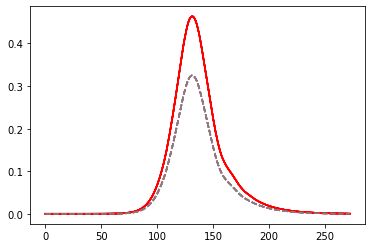

In [55]:
Radius_v = np.cbrt(3*Volume1[1,1,:]/(np.pi*4))
b_ext2 = 3*Qext1*dlnr/(4*Radius_v)
b_abs2 = 3*Qabs1*dlnr/(4*Radius_v)

b_ext3 = (Qext1 *Area1 *dlnr)/(Volume1)
b_abs3 = (Qabs1 *Area1 *dlnr)/(Volume1)

b_sca2 = b_ext2 - b_abs2
b_sca3 = b_ext3 - b_abs3

for i in range(8):
    plt.plot(b_ext3[0][i][:],'r')
    plt.plot(b_ext2[0][i][:],"--")

In [43]:
Phase_read = 'P11'
fn = f'/home/gregmi/GRASP_scripts/GRASP_TAMU/{Phase_read}.nc4'
ds1 = nc.Dataset(fn, 'r')

for i in range (16):plt.plot(ds1.variables['P11'][0][i][0],"b")


x = np.array(ds1.variables["n"][:].sort())
y = np.array(ds1.variables["k"][:].sort())
GRASP_r = np.array(ds1.variables["r"][:])
P11_try = np.array(ds1.variables["P11"][0,0,:,0])

NameError: name 'nc' is not defined